## Rain Prediction System

## 1. Introduction & Problem Statement
**Objectives:**
- Predict **Temperature** based on weather conditions (Regression).
- Predict **Rain** occurrence (Yes/No) (Classification).

**Problem:** How can we predict temperature and rain efficiently from weather data?

## 2. Dataset Description
- **Source:** Provided `weather.csv`
- **Rows:** 52,696
- **Columns:** 21
- **Important Columns:** `T` (Temperature), `raining` (Rain status)
- **Target Variables:**
  - `T` (Temperature Prediction)
  - `raining` (Rain Classification)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.decomposition import PCA

## Step 1 : Importing the dataset 

In [8]:
# Load the data
data = pd.read_csv(r"D:\BCG - persnol\LPU\\Notes\Sem2\CAP113\WeatherData\weather.csv")  
print(data.shape)
print(data.head())


(52696, 21)
                  date        p     T    Tpot  Tdew    rh  VPmax  VPact  \
0  2020-01-01 00:10:00  1008.89  0.71  273.18 -1.33  86.1   6.43   5.54   
1  2020-01-01 00:20:00  1008.76  0.75  273.22 -1.44  85.2   6.45   5.49   
2  2020-01-01 00:30:00  1008.66  0.73  273.21 -1.48  85.1   6.44   5.48   
3  2020-01-01 00:40:00  1008.64  0.37  272.86 -1.64  86.3   6.27   5.41   
4  2020-01-01 00:50:00  1008.61  0.33  272.82 -1.50  87.4   6.26   5.47   

   VPdef    sh  ...      rho    wv  max. wv     wd  rain  raining  SWDR  PAR  \
0   0.89  3.42  ...  1280.62  1.02     1.60  224.3   0.0      0.0   0.0  0.0   
1   0.95  3.39  ...  1280.33  0.43     0.84  206.8   0.0      0.0   0.0  0.0   
2   0.96  3.39  ...  1280.29  0.61     1.48  197.1   0.0      0.0   0.0  0.0   
3   0.86  3.35  ...  1281.97  1.11     1.48  206.4   0.0      0.0   0.0  0.0   
4   0.79  3.38  ...  1282.08  0.49     1.40  209.6   0.0      0.0   0.0  0.0   

   max. PAR   Tlog  
0       0.0  11.45  
1       0.0  1

In [10]:
# Show available columns
print("Available columns:", data.columns.tolist())

Available columns: ['date', 'p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC', 'rho', 'wv', 'max. wv', 'wd', 'rain', 'raining', 'SWDR', 'PAR', 'max. PAR', 'Tlog']


## Step 2 : Data Preprocessing 

In [13]:
# Drop missing values
data.dropna(inplace=True)

In [15]:
# --------- Feature Selection ---------
# Pick numerical columns only
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Numerical Features selected:", numerical_cols)

features = numerical_cols.copy()

# --------- Target Variable Creation ---------
# Use 'T' (Temperature) as the target
if 'T' in data.columns:
    median_temp = data['T'].median()
    data['TempHigh'] = (data['T'] > median_temp).astype(int)
    target = 'TempHigh'
else:
    raise Exception("No 'T' column found! Please select another feature.")


Numerical Features selected: ['p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC', 'rho', 'wv', 'max. wv', 'wd', 'rain', 'raining', 'SWDR', 'PAR', 'max. PAR', 'Tlog']


## Step3: Train-test split data and feature scaling

In [18]:
# --------- Train-Test Split ---------
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# --------- Feature Scaling ---------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4: Model Training and Evaluation


Model: Logistic Regression
Accuracy: 0.9979
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5329
           1       1.00      1.00      1.00      5211

    accuracy                           1.00     10540
   macro avg       1.00      1.00      1.00     10540
weighted avg       1.00      1.00      1.00     10540



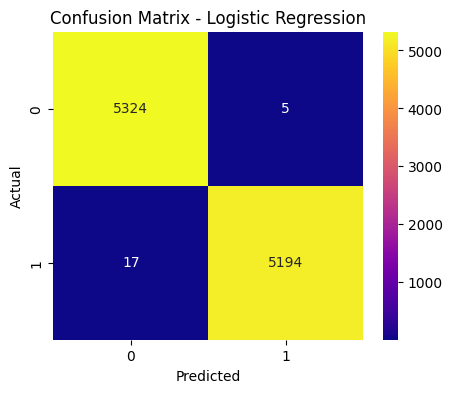


Model: Random Forest
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5329
           1       1.00      1.00      1.00      5211

    accuracy                           1.00     10540
   macro avg       1.00      1.00      1.00     10540
weighted avg       1.00      1.00      1.00     10540



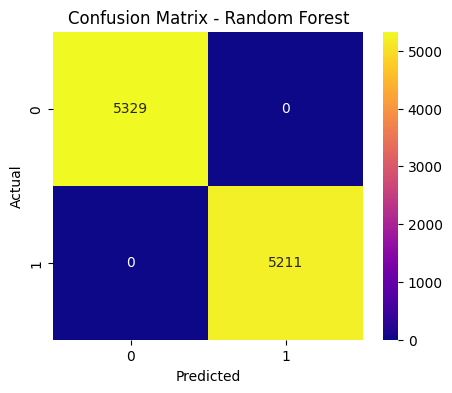


Model: SVM
Accuracy: 0.9967
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5329
           1       1.00      1.00      1.00      5211

    accuracy                           1.00     10540
   macro avg       1.00      1.00      1.00     10540
weighted avg       1.00      1.00      1.00     10540



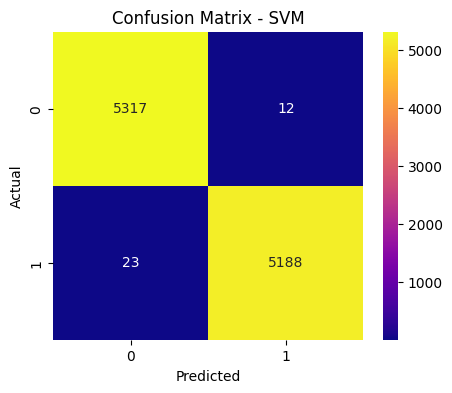


Model: KNN
Accuracy: 0.9858
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5329
           1       0.99      0.98      0.99      5211

    accuracy                           0.99     10540
   macro avg       0.99      0.99      0.99     10540
weighted avg       0.99      0.99      0.99     10540



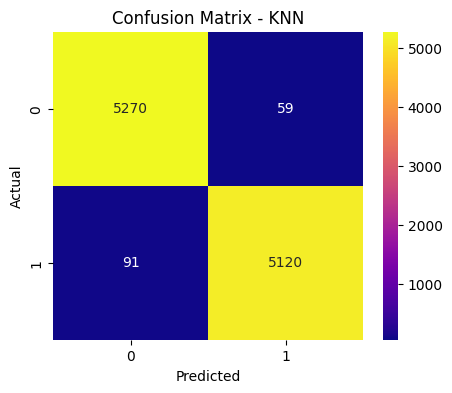

In [23]:
# --------- Model Training and Evaluation ---------
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

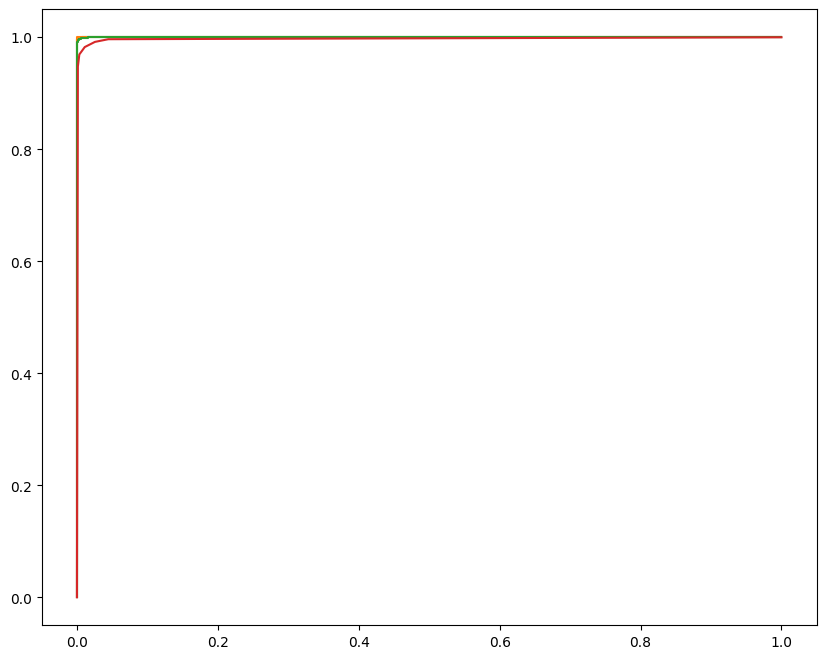

In [24]:
# --------- Plotting ROC Curve for Each Classifier ---------
plt.figure(figsize=(10, 8))
for name, model in models.items():
    # Predict probabilities
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

C:\Users\sanja\AppData\Local\Temp\ipykernel_43316\2427718610.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


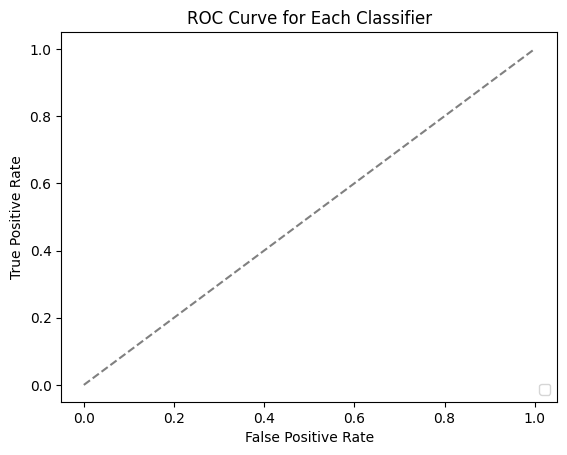

In [25]:
# Plotting the diagonal line for random guess
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for Each Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

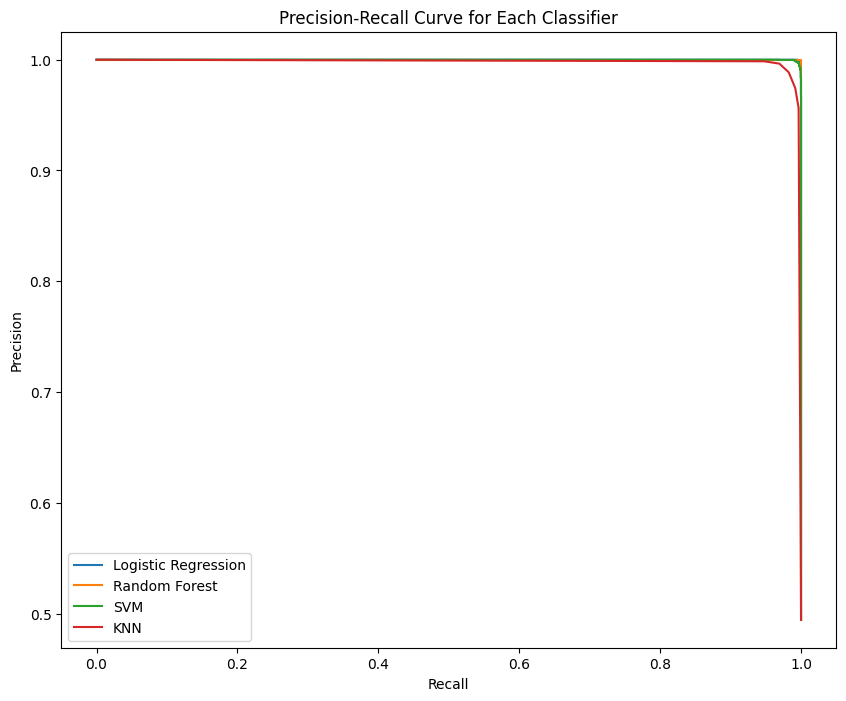

In [26]:
# --------- Plotting Precision-Recall Curves ---------
plt.figure(figsize=(10, 8))
for name, model in models.items():
    # Predict probabilities
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f'{name}')

plt.title('Precision-Recall Curve for Each Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

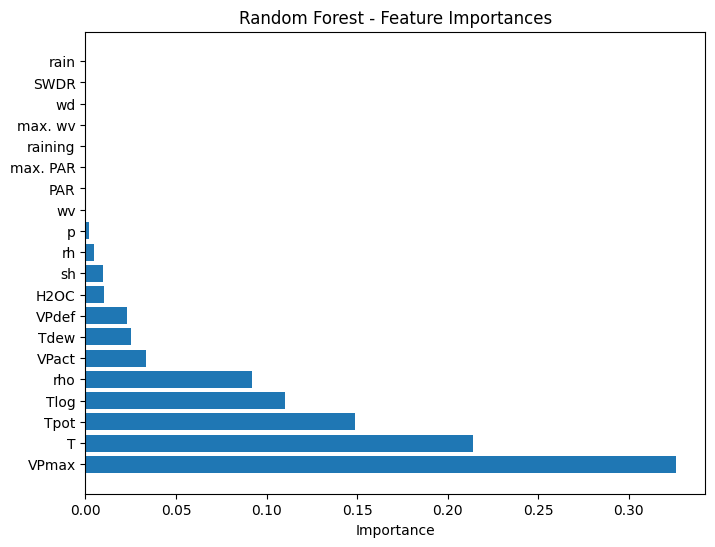

In [27]:
# --------- Plotting Feature Importance (for tree-based models) ---------
for name, model in models.items():
    if name in ['Random Forest']:
        # Plot feature importance for Random Forest
        plt.figure(figsize=(8, 6))
        feature_importances = model.feature_importances_
        indices = np.argsort(feature_importances)[::-1]
        plt.barh(range(X_train.shape[1]), feature_importances[indices], align='center')
        plt.yticks(range(X_train.shape[1]), np.array(features)[indices])
        plt.title(f'{name} - Feature Importances')
        plt.xlabel('Importance')
        plt.show()

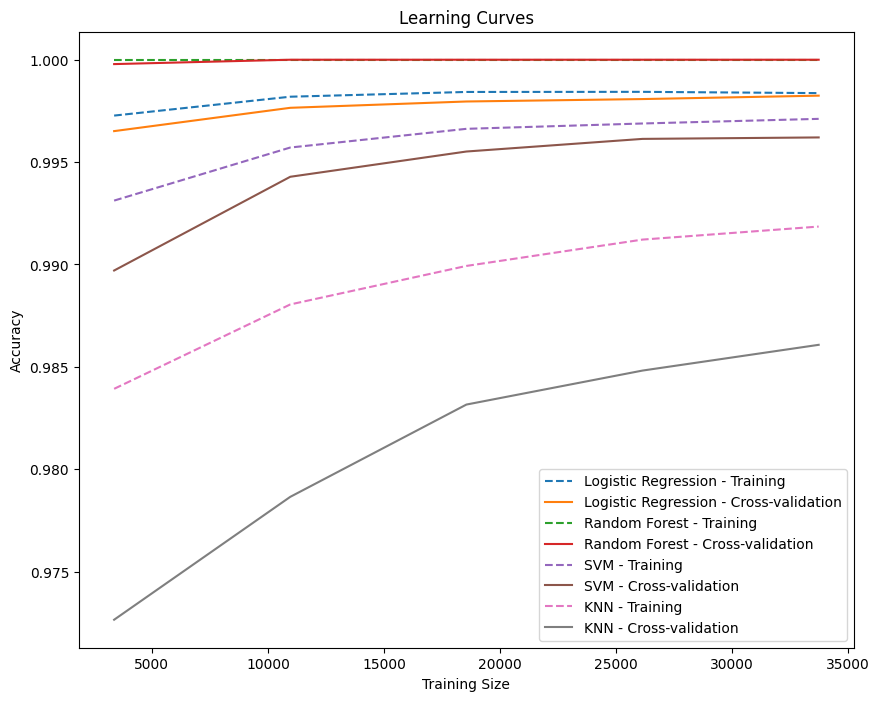

In [28]:
# --------- Plotting Learning Curves ---------
plt.figure(figsize=(10, 8))
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label=f'{name} - Training', linestyle='--')
    plt.plot(train_sizes, test_mean, label=f'{name} - Cross-validation')

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [29]:
# --------- Plotting Decision Boundaries (for 2D visualization) ---------
# Reduce dimensionality to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)

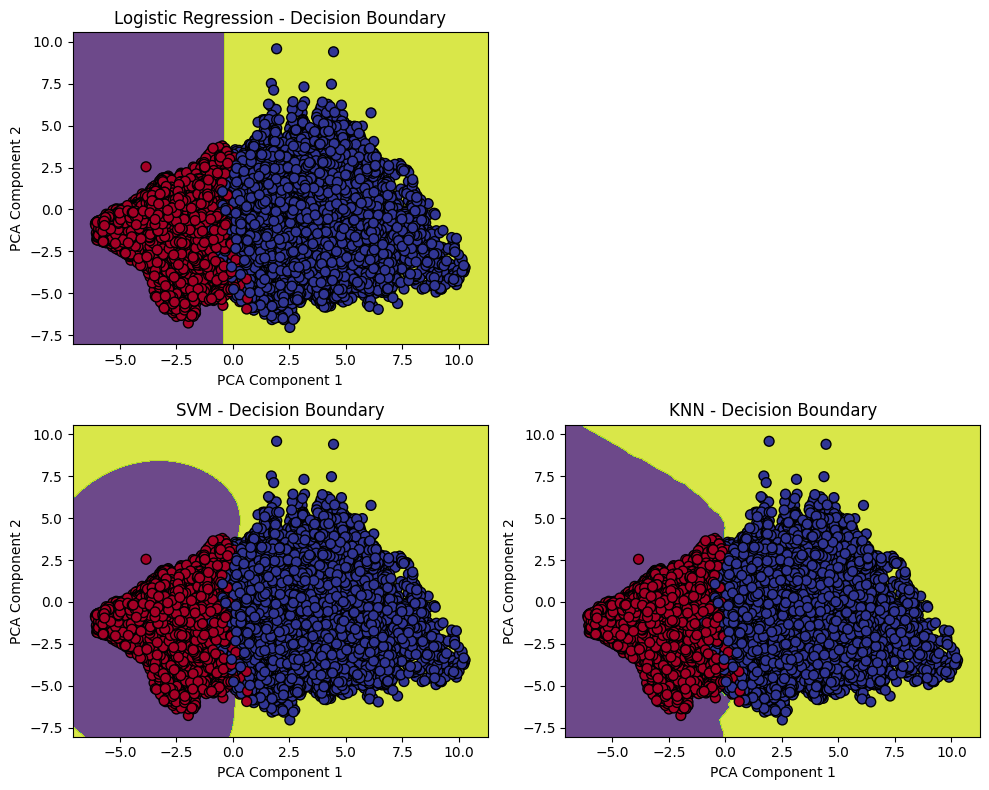

In [30]:
# Plot decision boundaries for each model
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        plt.subplot(2, 2, list(models.keys()).index(name) + 1)
        
        # Train the model
        model.fit(X_train_2d, y_train)
        
        # Create a meshgrid to plot decision boundaries
        h = .02
        x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
        y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=50, cmap=plt.cm.RdYlBu)
        plt.title(f'{name} - Decision Boundary')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_43316\755533362.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acc, y=models, palette='rocket')


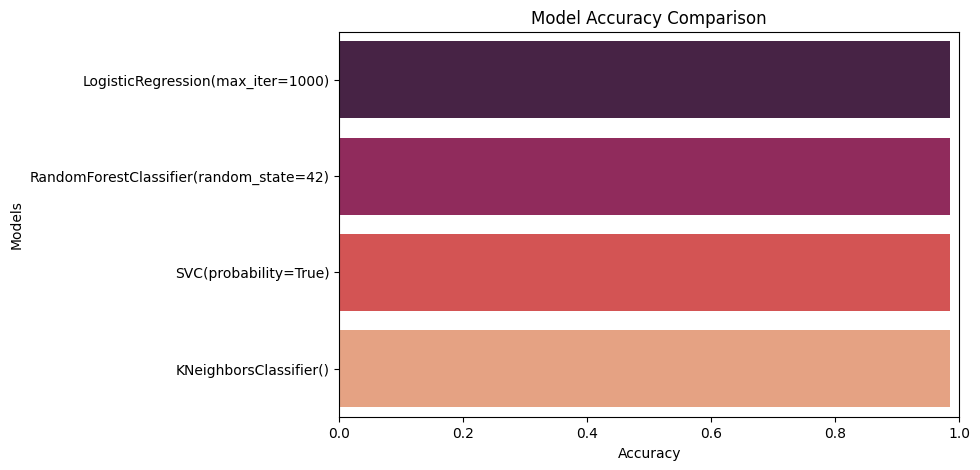

In [38]:
# --------- Displaying Overall Model Evaluation ---------
# You already have this code for accuracy comparison, and it's a good overview.
plt.figure(figsize=(8,5))
sns.barplot(x=acc, y=models, palette='rocket')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0,1)
plt.show()